In [ ]:
import pprint
import requests
import time

import numpy as np
import torch
import torchvision

import matplotlib.pyplot as plt
import torch.nn.functional as F

from io import BytesIO
from PIL import Image

# Lakota AI Code Camp Lesson 05: Matrix Algebra I

This is the start of matrix algebra.
Matrices and multi-dimensional arrays are essential to scientific computing and to neural networks in particular. A large portion of the architecture behind neural networks is a series of matrix multiplications and vector operations.
So, it's essential that you learn about these!

The primary framework for matrix operations is the BLAS (basic linear algebra subprograms) and these are the actual implementations used in scientific computing. Today, we're going to build our own:


*   vector class
*   matrix class
*   **dot product**
*   **saxpy** function (level 1 BLAS)
*   **gaxpy** function (level 2 BLAS)
*   **level 3** BLAS function

We're then going to work on understanding:

*   the ndarray class in numpy
*   the tensor class in pytorch
*   the stride method in tensor
After this, we're going to move onto working with these in the numpy and pytorch libraries.
We'll see that numpy is faster than our implementations (they are heavily optimized by thousands of researchers and developers over many years).
It's still important to understand what is happening under the hood!

Let's look at vectors first!

## Vectors

### Location

Suppose you're in a city and you need to know where you're at.
If you ask someone, they'll probably give you the street and cross street.
If you're in New York City, particularly, the East side of Manhattan, then you might ask where the nearest subway station and you might get the answer 72nd and 2nd.
We can represent that address by the numbers tuple (72, 2).

Similarly, coordinates on the earth can be expressed as a 2-tuple: lattitude and longitude. We're roughly at (44.4974672, -103.8711525).

### Inventory

Another use for vectors is storage of multiple variables.
Suppose you're a store-owner and you need to keep track of inventory or revenue.

| Chips   | Soda    | Candy |
|---------|---------|-------|
| \$113.00 | \$250.00 | \$125.00 |

We can represent this as the 3-tuple (113.00, 250.00, 125.00).

We should note that we are presuming that we don't change our store's stock.
This brings up an important characteristic of vectors.
The number of components does not change.
For directions, it's always a 2-tuple.
If we were a pilot, then it's 3-tuple.

When we're working with neural network models, the input to the model is often a collection of vectors or a collection of matrices and the ouptut is often a collection of vectors.
This is why we're going to learn about vectors and matrices, because they're integral to how neural networks work.

Let's look at an example of a neural network's vector output.
We're going to download a neural network image classification model.

In [ ]:
weights = torchvision.models.ResNet50_Weights.DEFAULT

model = torchvision.models.resnet50(weights=weights)

We're going to get an image:

In [ ]:
headers = {
    'User-Agent': 'Lakota AI Code Camp: Personal Script'
}

img_src = "https://upload.wikimedia.org/wikipedia/commons/a/af/Golden_retriever_eating_pigs_foot.jpg"

resp = requests.get(img_src, headers=headers, stream=True)

with open('sample.jpg', 'wb') as f:
    f.write(resp.content)

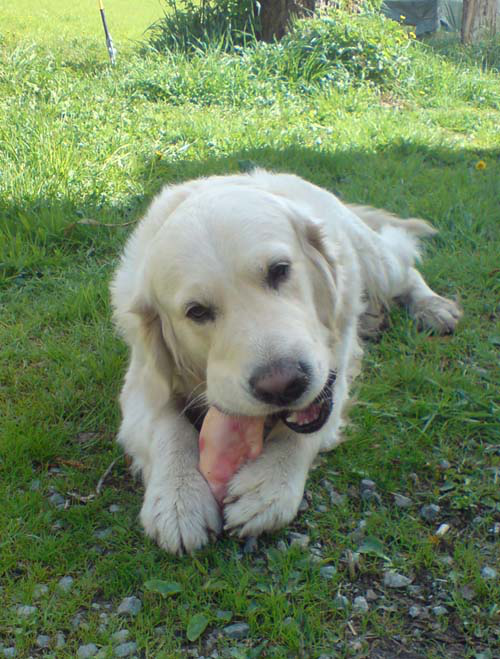

In [ ]:
with Image.open('sample.jpg') as im:
    im.show()

We convert our image to a torch tensor.

In [ ]:
with Image.open('sample.jpg') as im:
    img_tensor = torchvision.transforms.ToTensor()(im)

We get our predictions.

In [ ]:
pred = F.softmax(model(img_tensor.unsqueeze(0)), dim=-1)

In [ ]:
print(pred.reshape(1000).detach().numpy())

[0.00090511 0.00095266 0.00092186 0.00101441 0.00098061 0.001034
 0.00108087 0.00088536 0.00098759 0.00104465 0.0009112  0.00084647
 0.00096774 0.00093658 0.00090792 0.00096408 0.00091272 0.00098974
 0.00095453 0.0009281  0.00099541 0.00094746 0.00096448 0.00098821
 0.00092801 0.00096789 0.00106677 0.00109021 0.00092217 0.00101919
 0.00090084 0.00096085 0.00092859 0.00118673 0.0011886  0.00100209
 0.00104363 0.00094357 0.00093964 0.0009822  0.00090015 0.0009256
 0.00095787 0.00097881 0.00108514 0.00099016 0.00097417 0.00095378
 0.00101951 0.00093039 0.00103692 0.00123955 0.00101349 0.00091174
 0.00098969 0.00097376 0.00087322 0.00091436 0.00101666 0.00098628
 0.00098976 0.00095961 0.00103449 0.00094523 0.00101035 0.00102886
 0.00092368 0.00100654 0.00086555 0.00117833 0.00095743 0.0009805
 0.00082485 0.00090236 0.0008746  0.00091006 0.00098982 0.00098248
 0.00098939 0.0009977  0.0010018  0.00096477 0.00101195 0.00093498
 0.00101086 0.00106101 0.00091542 0.00123918 0.00099599 0.00115217

We get the top 5 most probable values.

In [ ]:
torch.topk(pred, 5)

torch.return_types.topk(
values=tensor([[0.0019, 0.0017, 0.0016, 0.0015, 0.0015]], grad_fn=<TopkBackward0>),
indices=tensor([[208, 207, 222, 257, 258]]))

In [ ]:
for index in torch.flatten(torch.topk(pred, 5).indices):
    print(weights.meta["categories"][index])

Labrador retriever
golden retriever
kuvasz
Great Pyrenees
Samoyed


We see that the model predicted that we have a Labrador retriever and the caption from Wikipedia states that it's a Labrador retriever!

We're going to move onto the dot product next!